# Projeto 1 - Ciência dos Dados

### Nome: Antonio Fonseca

## Pergunta (s) a ser respondida

Ex.: 

## Explicação da hipótese e mecanismo

Em um cenario ideal, com o investimento na industrializacao dos paises membros do Brics, o aumento no consumo de recursos naturais deveria ser mais lendo do que no restante do mundo. 

Para comprovar ou negar a hipotese original, irei contrapor dados globais e dos paises membros do grupo em dois fatores: porcentagem da terra ainda preservado com floresta, e a importancia na agricultura no PIB. A principio ambas as grandezas deverão diminuir, porém a segunda em taxa maior que a primeira

## Bases de dados usadas

Todas as bases de dados utilizadas para este trabalho foram retiradas do link: https://www.gapminder.org/data/ estando denominadas pelo provedor como "Forest Cover" (https://www.fao.org/forestry/sofo/en/) e "Agriculture (% of GDP)" (https://data.worldbank.org/indicator/NV.AGR.TOTL.ZS)

## Análise de dados

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dados_mata = pd.read_excel('forest_coverage_percent.xlsx')
dados_agri = pd.read_excel('agriculture_percent_of_gdp.xlsx')
print(os.getcwd())

C:\Users\Antonio Fonseca\Desktop\Insper\2 SEMESTRE INSPER\Ciencia dos dados\New folder\C_dados1


Agora é necessario limpar cada um dos arquivos, começando pelo quediz respeito a area de florestas, que será referenciado como mata_, o crecimento urbano como cres_ e o papel da agricultura como agri_, sendo todos seguidos com diferentes variações dependendo da etapa 

In [2]:
mata_index = dados_mata.set_index('country')
agri_index = dados_agri.set_index('country')

In [3]:
Brics = ['Brazil','Russia', 'India', 'China', 'South Africa']
mata_index.loc[:,"BRICS"] = "não"
mata_index.loc[Brics, "BRICS"] = "sim"

In [4]:
for e in range(20):
    mata_index = mata_index.drop(mata_index.columns[1], axis = 1)

mata_index = mata_index.drop(mata_index.columns[2], axis = 1)
mata_index = mata_index.drop(mata_index.columns[2], axis = 1)
mata_certo = mata_index.drop(mata_index.columns[2], axis = 1)

mata_certo.head()

,1990,2011,2015,BRICS
country,,,,
Afghanistan,2.07,2.07,2.07,não
Albania,28.80,28.30,28.20,não
Algeria,0.70,0.81,0.82,não
Andorra,34.00,34.00,34.00,não
Angola,48.90,46.80,46.40,não


In [5]:
Brics = ['Brazil','Russia', 'India', 'China', 'South Africa']
agri_index.loc[:,"BRICS"] = "não"
agri_index.loc[Brics, "BRICS"] = "sim"

In [6]:

for e in range(30):
    agri_index = agri_index.drop(agri_index.columns[0], axis = 1)
agri_index.head()

for e in range(20):
    agri_index = agri_index.drop(agri_index.columns[1], axis = 1)
agri_index.head()

for e in range(6):
    agri_index = agri_index.drop(agri_index.columns[2], axis = 1)
agri_certo = agri_index
agri_certo.head()

,1990,2011,BRICS
country,,,
Afghanistan,NaN,23.600,não
Albania,35.9,18.200,não
Algeria,10.4,8.110,não
Andorra,NaN,0.535,não
Angola,16.4,NaN,não


In [15]:
dados = agri_certo.join(mata_certo, how='inner',lsuffix = '_agri', rsuffix ='_mata')
dados.head()

,1990_agri,2011_agri,BRICS_agri,1990_mata,2011_mata,2015,BRICS_mata
country,,,,,,,
Afghanistan,NaN,23.600,não,2.07,2.07,2.07,não
Albania,35.9,18.200,não,28.80,28.30,28.20,não
Algeria,10.4,8.110,não,0.70,0.81,0.82,não
Andorra,NaN,0.535,não,34.00,34.00,34.00,não
Angola,16.4,NaN,não,48.90,46.80,46.40,não


In [17]:
dados['variacao1']= dados['2011_agri'] / dados['1990_agri']
dados['variacao2']= dados['2011_mata'] / dados['1990_mata']
dados.columns

Index([ '1990_agri',  '2011_agri', 'BRICS_agri',  '1990_mata',  '2011_mata',
               2015, 'BRICS_mata',  'variacao1',  'variacao2'],
      dtype='object')

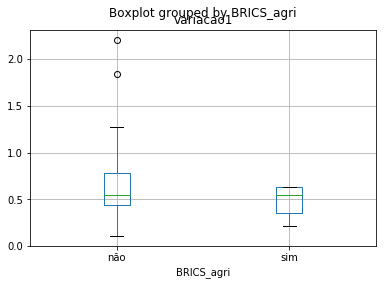

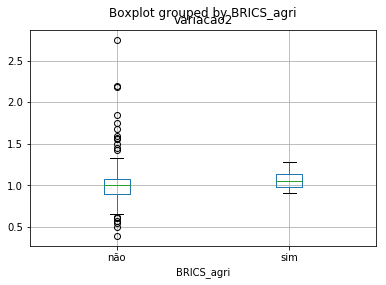

In [19]:
dados.boxplot(column='variacao1', by="BRICS_agri")
dados.boxplot(column='variacao2', by="BRICS_agri")